# Unsupervised Learning
## Dimension Reduction and Clustering


## 1) Dimension Reduction

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

(100,)


(-10, 10)

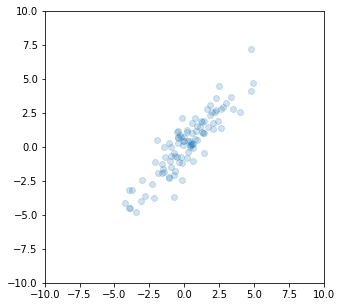

In [2]:
rng = np.random.RandomState(10)
N = 100
rx = rng.normal(loc=[0], scale = [2.0], size=[100]) 
print(rx.shape)
ry = rx+1*rng.normal(loc=[0], scale = [1.0], size=[100]) 
X = np.zeros((N,2))
X[:,0] = rx
X[:,1] = ry
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.ylim([-10,10])
plt.xlim([-10,10])


## pca finds principal component axis of a data 

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print(pca.components_)

[[ 0.64970197  0.76018902]
 [ 0.76018902 -0.64970197]]


In [14]:
pca.mean_

array([0.15883333, 0.22803051])

### these are vectors indicating the direction of principal axes 
### They are orthogonal to each other

Lets visualize them

[5.63086514 6.58843905]
[ 1.51636752 -1.29597632]


(-10, 10)

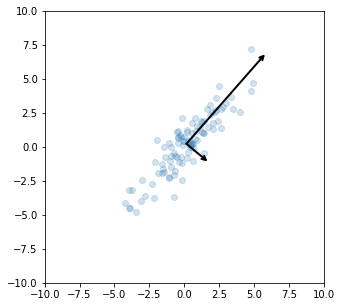

In [15]:
# define a method to draw arrows. 
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

    # plot data

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector *  3*np.sqrt(length)
    print(v)
    draw_vector(pca.mean_, pca.mean_ + v)
#plt.axis('equal')
plt.ylim([-10,10])
plt.xlim([-10,10])
    

### The principal axis are the axis of the data distribution where variance ix maximal. 

This means if you project the data into principal axis, you will see most spread distribution

After the first one the second axis is the next axis where projections will be more spread. 

These axes are orthogonal

None orthogonal axes are not informative, they can be produced by these two axes. 

### The principal axes can be used to remove correlation in data

(-7.031387537892735, 9.06507021861524, -1.9416407107217015, 2.076925559288596)

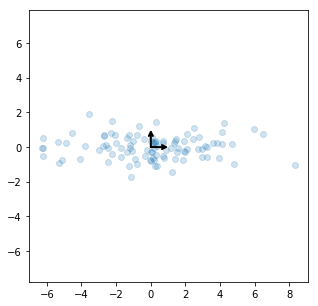

In [16]:
X_t = pca.transform(X)
plt.figure(figsize=(5,5))
plt.scatter(X_t[:, 0], X_t[:, 1], alpha=0.2)
draw_vector([0,0], [1,0])
draw_vector([0,0], [0,1])
plt.axis('equal')

### The principal axes can be used to normalize data: remove scales, (relative variance )

In [17]:
pca = PCA(n_components=2, whiten=True) # whiten only affects transform, not fit!
X_t = pca.fit_transform(X)

(-2.4416260051180823,
 3.145578746195457,
 -2.9140451917943984,
 3.1175091706047082)

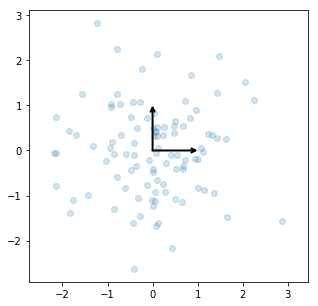

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(X_t[:, 0], X_t[:, 1], alpha=0.2)
draw_vector([0,0], [1,0])
draw_vector([0,0], [0,1])
plt.axis('equal')

### The principal axes can be used for dimension reduction

In [10]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (100, 2)
transformed shape: (100, 1)


(-10, 10)

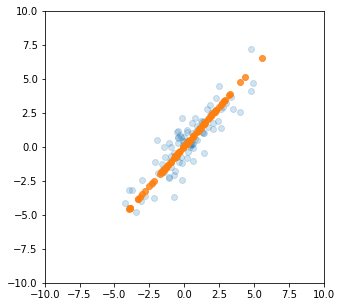

In [11]:
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.xlim([-10,10])
plt.ylim([-10,10])
#plt.axis('equal')

### PCA for visualization: Handwritten digits

In [12]:
from sklearn.datasets import load_digits       
digits = load_digits()       
digits.data.shape

(1797, 64)

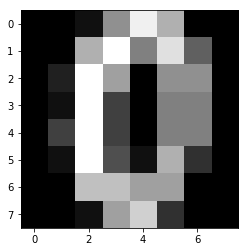

In [26]:
# plot one of the digits. 
plt.imshow(digits.data[10,:].reshape((8,8)), cmap='gray')

In [14]:
# What is the dimension of X. 

In [29]:
pca = PCA(2)  # project from 64 to 2 dimensions        
projected = pca.fit_transform(digits.data)
print(digits.data.shape)        
print(projected.shape)

(1797, 64)
(1797, 2)


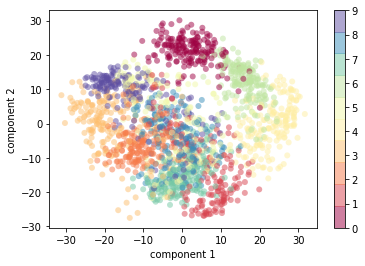

In [30]:
plt.scatter(projected[:, 0], projected[:, 1],c=digits.target, 
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [31]:
## Lets analyse the vectors
pca.components_

array([[-4.32383474e-17, -1.73094640e-02, -2.23428845e-01,
        -1.35913277e-01, -3.30322520e-02, -9.66340465e-02,
        -8.32941424e-03,  2.26900648e-03, -3.20516546e-04,
        -1.19308904e-01, -2.44451683e-01,  1.48512815e-01,
        -4.67318476e-02, -2.17740728e-01, -1.48136642e-02,
         4.47779968e-03, -4.94135289e-05, -7.95419383e-02,
         8.33951160e-02,  2.15915380e-01, -1.72126821e-01,
        -1.63712128e-01,  2.86444536e-02,  4.23251935e-03,
         9.85489051e-05,  6.42319008e-02,  2.54093300e-01,
        -3.56770748e-02, -2.09462632e-01, -4.31311335e-02,
         5.13118982e-02,  2.13422803e-04,  0.00000000e+00,
         1.59950853e-01,  3.68690789e-01,  1.64406858e-01,
         8.52007423e-02,  3.72983066e-02,  2.15867335e-02,
         0.00000000e+00,  1.28865543e-03,  1.06945245e-01,
         3.03067405e-01,  2.47813050e-01,  2.09637245e-01,
         1.22325053e-02, -3.69458044e-02,  1.61485208e-03,
         6.93023623e-04, -8.35145809e-03, -5.58599385e-0

In [32]:
# mean? 
pca.mean_.shape

(64,)

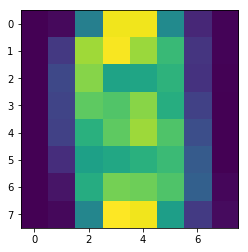

In [36]:
# lets reshape and plot the vectors and mean
plt.imshow(pca.mean_.reshape(8,8))

Text(0.5, 1.0, 'Principal Components: Eigen Digits')

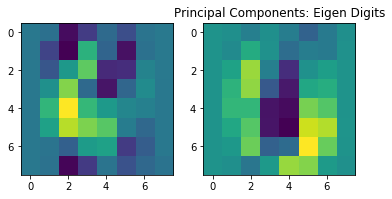

In [40]:
plt.subplot(1,2,1)
plt.imshow(pca.components_[0].reshape(8,8),)
plt.subplot(1,2,2)
plt.imshow(pca.components_[1].reshape(8,8),)
plt.title('Principal Components: Eigen Digits')

IndexError: index 10 is out of bounds for axis 0 with size 10

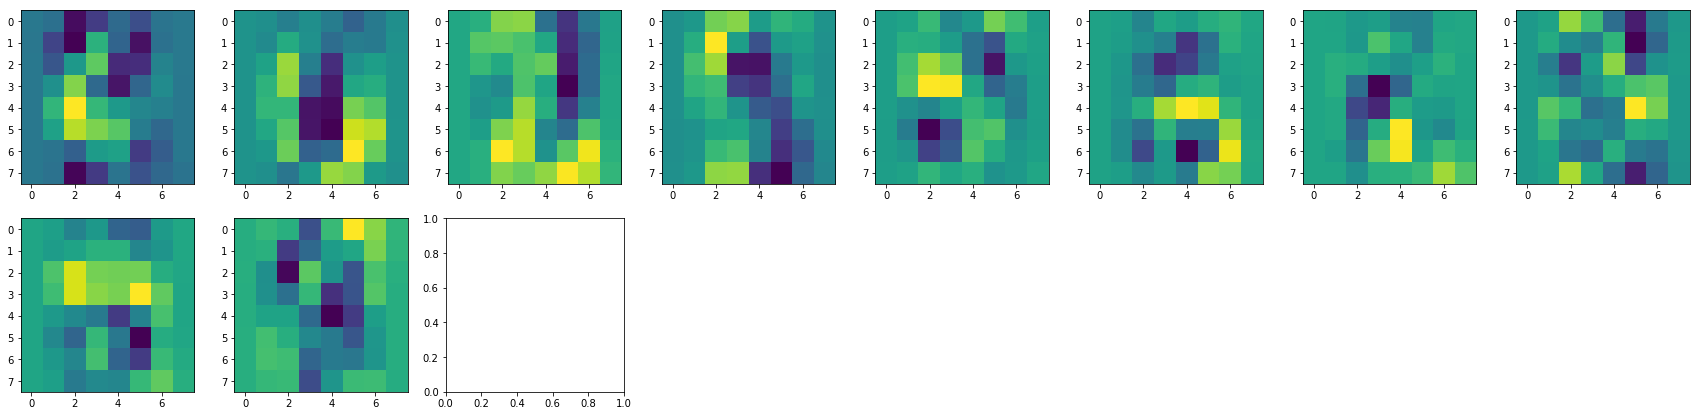

In [58]:
n_comp = 10
pca = PCA(n_comp)
projected = pca.fit_transform(digits.data)
plt.figure(figsize=(30,30))
k = 0
for i in range(8):
    for j in range(8):
        plt.subplot(8,8,k+1)
        plt.imshow(pca.components_[k].reshape(8,8))
        k += 1

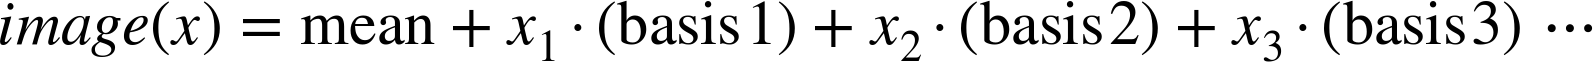

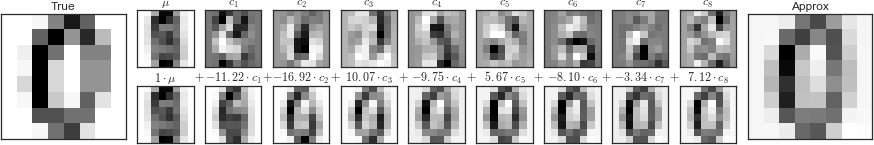

In [59]:
digits_5_reconstructed = pca.mean_+ projected[0].dot(pca.components_)

In [60]:
plt.imshow(digits_0_reconstructed.reshape(8,8), cmap='gray')

NameError: name 'digits_0_reconstructed' is not defined

In [ ]:
# lets repeat this for 5 components. 




### HW Q1) 

# Repeat above for sklearn fetch_lfw_people data
  
  a) Plot mean face and first 8 eigenfaces (principal componets). 
  
  b ) Transform one face using the mean face and eigenfaces. print the coefficients.
  
  c ) Inverse Transform and plot the face. 
  
 


## How to choose number of components

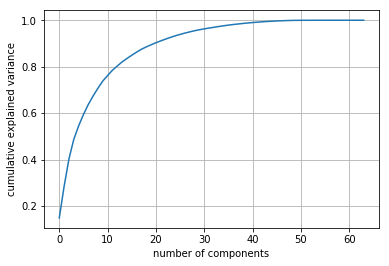

In [28]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

### PCA helps to visualize data
### summarize data
### preproces data: feature extraction
### Eigenfaces is famous method for face recognition. 
### clean data. 

## Weaknesses


- outliers in the data. 
- nonlinear data

 see the book Python Data science handbook

## 2) Clustering

### k-Means 

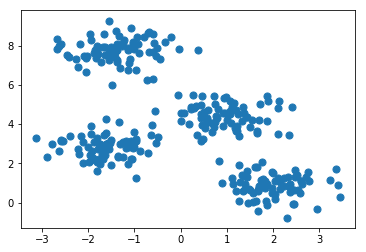

In [29]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

## K-means assumes

- The “cluster center” is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers
- So number of cluster centers = number of groups/classes
- So it is not really an approach for classification

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [31]:
# kmeans calculates two things
centers = kmeans.cluster_centers_
print(centers)
# for center points of D dimensions. 

[[-1.58438467  2.83081263]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]]


In [32]:
# point labels. 
print(y_kmeans)

[2 1 3 1 2 2 0 3 1 1 0 1 3 1 2 3 3 2 0 0 2 2 3 0 0 3 2 3 0 3 1 1 3 1 1 1 1
 1 0 2 3 0 3 3 0 0 1 0 1 2 0 2 1 2 2 0 1 0 1 2 1 3 1 0 0 0 1 2 1 0 3 0 1 0
 0 1 0 3 2 1 2 3 2 2 1 3 2 3 1 1 3 2 1 0 0 3 2 2 3 0 1 2 1 2 3 2 2 3 1 3 0
 0 2 1 2 3 1 2 2 3 0 2 0 2 2 2 2 0 2 0 1 0 0 2 1 0 0 1 3 1 1 0 3 0 3 0 1 3
 1 1 1 3 1 3 2 0 1 0 2 3 1 3 3 2 3 0 0 3 2 3 3 1 2 3 0 1 2 2 3 0 2 3 0 0 3
 3 3 3 2 1 3 0 3 3 0 0 0 3 0 1 3 0 2 0 3 1 0 1 3 1 3 0 3 3 1 0 0 2 2 3 1 2
 2 0 2 0 3 1 1 3 3 1 3 2 0 3 2 0 1 0 2 3 2 1 1 1 1 0 0 1 3 0 2 3 0 0 0 2 2
 1 3 3 0 2 1 0 3 1 3 2 2 0 0 3 2 2 2 3 1 1 2 2 3 2 2 2 1 0 1 3 2 2 1 1 1 2
 2 3 1 0]


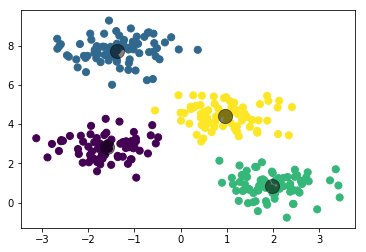

In [33]:
# lets plot points again and centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')


In [ ]:
# lets repeat the test for 2 or 5 clusters. 2

## k-Means Algorithm: Expectation–Maximization

1) Start with an initial guess for cluster centers

2) Repeat until converged or iteration<N

    - E-Step: assign points to the nearest cluster center

    - M-Step: set the cluster centers to the mean


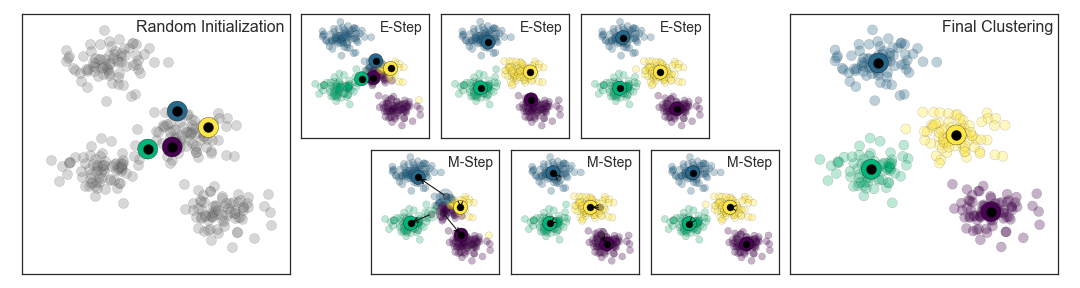

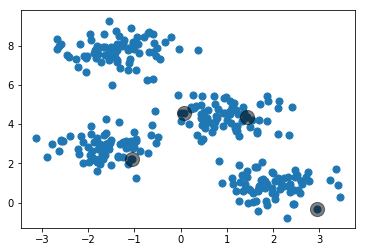

In [36]:
# LETS IMPLEMENTED THIS

# 1) Assign random cluster centers.
n_clusters = 4 
rng = np.random.RandomState(23)
i = rng.permutation(X.shape[0])[:n_clusters]
centers = X[i]
plt.scatter(X[:, 0], X[:, 1],s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    

[[ 5.37479861  3.61434315 10.62746062  6.48060768]
 [17.30091477 27.18452022 79.18235583 10.31365004]
 [ 0.59958422 13.28429679 32.864844    1.43605937]
 ...
 [ 1.01316674  7.67716078 30.1319091   0.12877995]
 [12.78838189 33.22790379 72.85446396 10.475054  ]
 [13.04396537  0.82460884 32.07280706  6.81225566]]
Assigned labels [1 3 0 3 1 2 1 0 3 3 1 3 0 3 2 3 0 2 1 1 2 2 3 1 1 3 2 3 1 3 3 3 0 3 3 3 3
 3 1 2 0 1 3 0 1 1 3 1 3 2 1 2 3 2 0 1 3 1 3 2 3 3 3 1 1 1 3 2 3 1 0 1 3 1
 1 3 1 0 2 3 2 3 2 2 3 0 2 3 3 3 3 2 3 1 1 0 2 2 3 1 3 2 3 2 0 2 2 0 3 0 1
 1 2 3 2 0 3 1 2 3 1 2 1 2 2 2 2 1 2 1 3 1 1 2 3 1 1 3 3 3 3 1 0 3 0 1 3 3
 3 3 3 0 3 3 2 1 3 1 2 0 3 3 0 2 0 1 1 3 2 0 0 3 2 0 3 3 2 2 3 1 2 0 1 1 3
 0 0 0 2 3 3 1 0 3 1 1 1 0 1 3 0 1 2 1 0 3 1 3 0 3 0 1 3 0 3 1 1 2 2 3 3 2
 2 1 2 1 3 3 3 0 0 3 0 1 1 0 2 1 3 1 2 3 2 3 3 3 3 1 1 3 0 1 2 3 1 1 3 2 2
 3 0 3 1 2 3 1 0 3 3 2 2 1 1 0 2 2 2 0 3 3 2 2 0 2 2 2 3 1 3 0 2 2 3 3 3 2
 2 3 3 1]


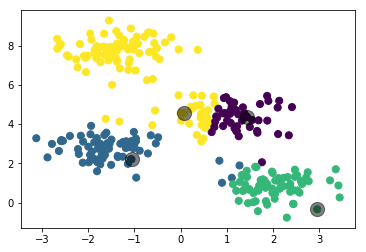

In [37]:
# Define a method to calculate distance of each point to each center. 
def calculate_distances(X, centers):
    n = centers.shape[0]
    X_dist = np.zeros(shape=(X.shape[0],n))
    for i in range(n):
        X_dist[:,i] # complete here
    
    return X_dist


def assign_labels(distances):
    #label is the index of the closest distance
    return labels



dist_X= calculate_distances(X,centers)
print(dist_X)
y_labels = assign_labels(dist_X)
print("Assigned labels",y_labels)
plt.scatter(X[:, 0], X[:, 1], c=y_labels,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

[[ 1.32857932  4.33240968]
 [-1.46265349  2.71398171]
 [ 2.04042929  0.81027685]
 [-0.8972888   6.76393478]]


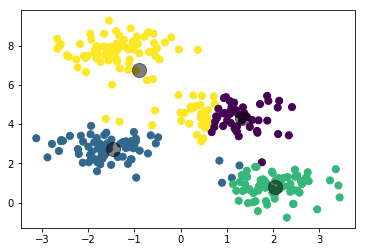

In [38]:
# update centers.
new_centers = np.array([X[y_labels == i].mean(0) for i in range(n_clusters)])
print(new_centers)

plt.scatter(X[:, 0], X[:, 1], c=y_labels,s=50, cmap='viridis')
plt.scatter(new_centers[:, 0], new_centers[:, 1], c='black', s=200, alpha=0.5)

# HW 8 b) 

a) Write a method (kmeans) which repeats above until convergence or less than N iterations 

b) Run **your kmeans** algorithm on digits data. 

- Follow the book (Example 1: k-Means on digits). 
- Plot Cluster centers learned by k-means
- Kmeans is not ideal for classification but if you treat the cluster labels as classes Plot confusion matrix 


In [ ]:
## this is code from book


from sklearn.metrics import pairwise_distances, pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clustering
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    max_ite = 10
    while True or i<max_ite:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                       for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        
        centers = new_centers

        return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')